# Question 1 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups.

### 1. Import the necessary modules

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [25]:
data = pd.read_csv(r"/content/segmentation data.csv")
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

In [26]:
# Check for null values
null_values = data.isnull().sum()
print("Null values in each column:\n", null_values)

# Drop the 'ID' column
data.drop(columns=['ID'], inplace=True)

# Define age groups
def age_group(age):
    if age < 20:
        return 0
    elif 20 <= age < 30:
        return 1
    elif 30 <= age < 40:
        return 2
    elif 40 <= age < 50:
        return 3
    elif 50 <= age < 60:
        return 4
    else:
        return 5

# Apply age groups to the 'Age' column
data['Age'] = data['Age'].apply(age_group)

# Scale the numerical columns 'Age' and 'Income'
scaler = StandardScaler()
data[['Age', 'Income']] = scaler.fit_transform(data[['Age', 'Income']])

# Display the first few rows of the preprocessed data
print(data.head())

Null values in each column:
 ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64
   Sex  Marital status       Age  Education    Income  Occupation  \
0    0               0  2.438645          2  0.097524           1   
1    1               1 -0.964313          1  0.782654           1   
2    0               0  0.737166          1 -0.833202           0   
3    0               0  0.737166          1  1.328386           1   
4    0               0  1.587905          1  0.736932           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  


### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

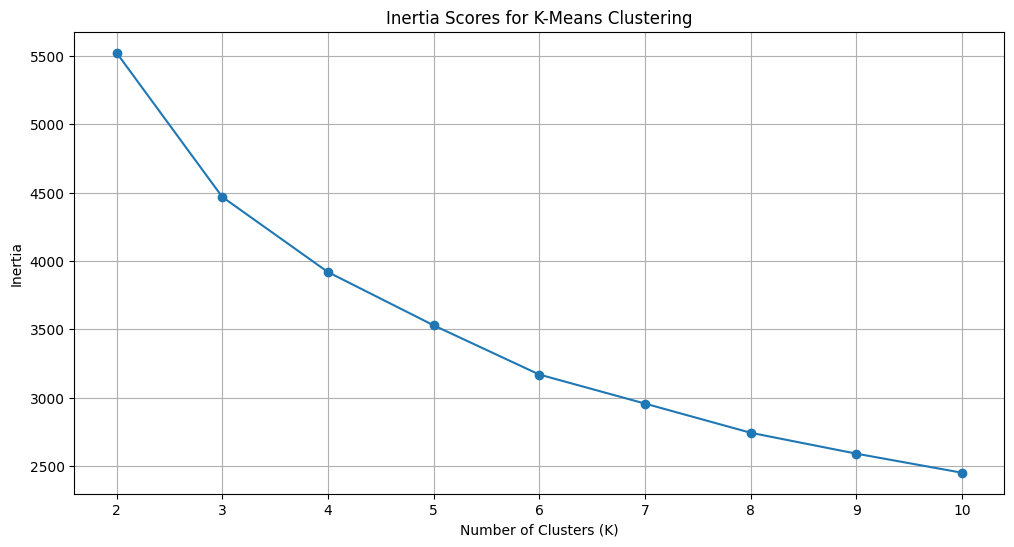

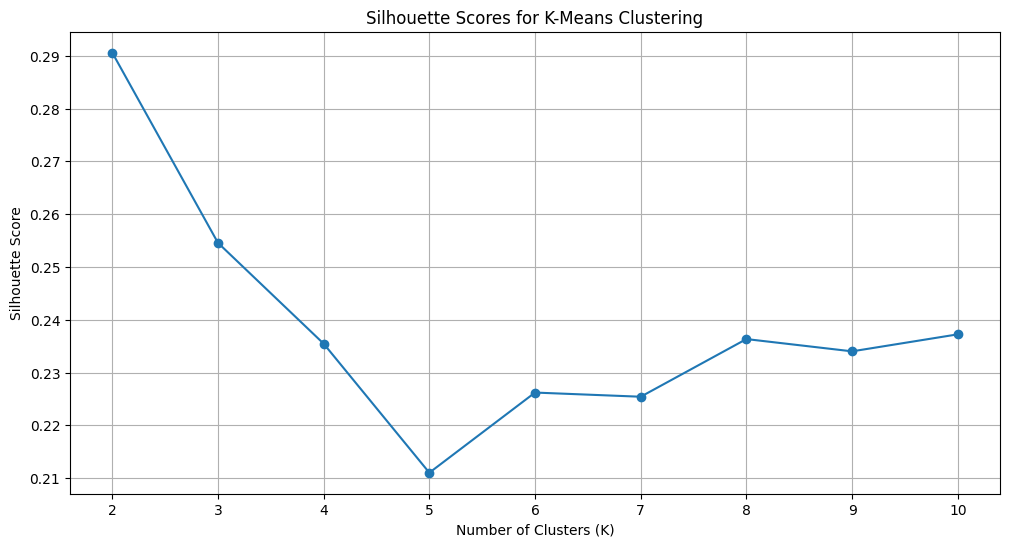

The optimal number of clusters based on silhouette score is: 2


In [27]:
# List of K values
k_values = list(range(2, 11))

# Lists to store inertia and silhouette scores
inertia_scores = []
silhouette_scores = []

# Fit KMeans models and calculate scores for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia_scores.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot inertia scores
plt.figure(figsize=(12, 6))
plt.plot(k_values, inertia_scores, marker='o')
plt.title('Inertia Scores for K-Means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plot silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Determine the optimal K value based on the silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'The optimal number of clusters based on silhouette score is: {optimal_k}')

### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

In [28]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data)
data['Cluster by k means'] = kmeans.labels_

# Print the first few rows of the data with cluster labels
print(data.head())

   Sex  Marital status       Age  Education    Income  Occupation  \
0    0               0  2.438645          2  0.097524           1   
1    1               1 -0.964313          1  0.782654           1   
2    0               0  0.737166          1 -0.833202           0   
3    0               0  0.737166          1  1.328386           1   
4    0               0  1.587905          1  0.736932           1   

   Settlement size  Cluster by k means  
0                2                   1  
1                2                   1  
2                0                   0  
3                1                   1  
4                1                   1  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

In [29]:
# Define lists of hyperparameters
eps_values = [0.1, 0.2, 0.5, 1, 2]
min_samples_values = [3, 4, 5, 6]

# Variables to store the best score and parameters
best_score = -1
best_params = {'eps': None, 'min_samples': None}

# Nested loop to fit DBSCAN model and calculate silhouette score
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        # Calculate silhouette score only if more than 1 cluster is formed
        if len(set(labels)) > 1:
            score = silhouette_score(data, labels)
            print(f"eps: {eps}, min_samples: {min_samples}, silhouette score: {score}")

            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

print(f"Best silhouette score: {best_score}")
print(f"Best parameters: eps = {best_params['eps']}, min_samples = {best_params['min_samples']}")

# Fit DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
data['Cluster by dbscan'] = dbscan.fit_predict(data)

# Print the first few rows of the data with cluster labels
print(data.head())

eps: 0.1, min_samples: 3, silhouette score: 0.2573596710595291
eps: 0.1, min_samples: 4, silhouette score: 0.1560271733709791
eps: 0.1, min_samples: 5, silhouette score: 0.08410128401321547
eps: 0.1, min_samples: 6, silhouette score: 0.015494492154638351
eps: 0.2, min_samples: 3, silhouette score: 0.374898319773249
eps: 0.2, min_samples: 4, silhouette score: 0.30082202035488503
eps: 0.2, min_samples: 5, silhouette score: 0.2484144606448752
eps: 0.2, min_samples: 6, silhouette score: 0.2028503992520835
eps: 0.5, min_samples: 3, silhouette score: 0.44585431045818813
eps: 0.5, min_samples: 4, silhouette score: 0.37678402145683015
eps: 0.5, min_samples: 5, silhouette score: 0.34923992730121883
eps: 0.5, min_samples: 6, silhouette score: 0.322335798843853
eps: 1, min_samples: 3, silhouette score: 0.289948060527542
eps: 1, min_samples: 4, silhouette score: 0.26788000773719967
eps: 1, min_samples: 5, silhouette score: 0.2556465546589492
eps: 1, min_samples: 6, silhouette score: 0.249636395365